In [1]:
%%capture
!pip install gymnasium pygame -q

In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import gymnasium as gym
from gym.wrappers import RecordVideo

import warnings
warnings.filterwarnings('ignore')

from agent import QLearningAgent
from utils import running_mean, save_agent, load_agent

In [3]:
gym.__version__

'1.0.0'

In [4]:
env = gym.make("Taxi-v3")
agent = QLearningAgent(env)

print('State space:', agent.state_n)
print('Action space:', agent.action_n)
print('Threshold: ', env.spec.reward_threshold)

best_score = -np.inf
episodes = 1000
scores, eps_history, steps = [], [], []

for episode in tqdm(range(1, episodes + 1)):

    observation = env.reset()[0]
    done = False
    score = 0
    n_steps = 0

    while not done:

        action = agent.choose_action(observation)
        next_observation, reward, done, _, info = env.step(action)
        agent.learn(observation, action, reward, next_observation)
        score += reward
        observation = next_observation
        n_steps += 1

    agent.update_epsilon()
    scores.append(score)
    eps_history.append(agent.epsilon)
    steps.append(n_steps)

    if episode % 100 == 0:
        print('Episode:{} Score:{}'.format(episode, score))

    if score > best_score:
        best_score = score

if np.mean(scores[-30:]) > env.spec.reward_threshold:
    print(f'Taxi-v3 game successfully solved with an average score of {np.mean(scores[-30:]):.2f}')

print(f'Best score recorded: {best_score}')

State space: 500
Action space: 6
Threshold:  8


 13%|█▎        | 126/1000 [00:04<00:07, 116.40it/s]

Episode:100 Score:-137


 26%|██▌       | 257/1000 [00:04<00:02, 290.37it/s]

Episode:200 Score:-25


 38%|███▊      | 384/1000 [00:04<00:01, 467.74it/s]

Episode:300 Score:-20
Episode:400 Score:14


 62%|██████▏   | 621/1000 [00:05<00:00, 691.02it/s]

Episode:500 Score:10
Episode:600 Score:6


 86%|████████▋ | 864/1000 [00:05<00:00, 770.84it/s]

Episode:700 Score:6
Episode:800 Score:8


100%|██████████| 1000/1000 [00:05<00:00, 177.75it/s]

Episode:900 Score:11
Episode:1000 Score:8
Taxi-v3 game successfully solved with an average score of 8.27
Best score recorded: 15


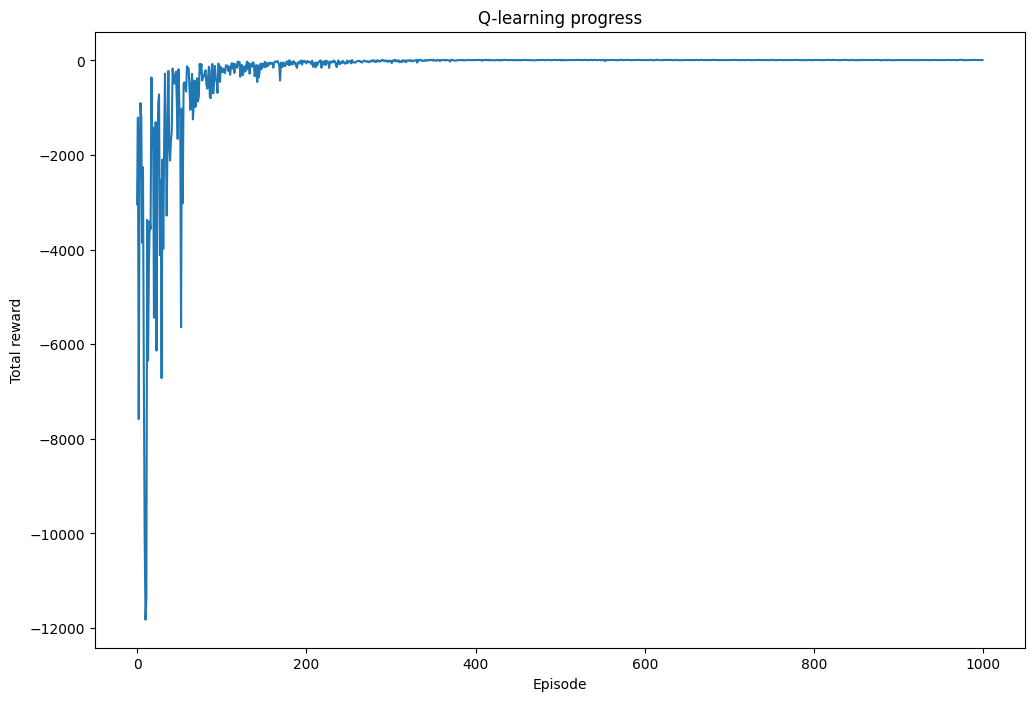

In [5]:
fig = plt.figure(figsize=(12, 8))
plt.plot(scores)
plt.title('Q-learning progress')
plt.xlabel('Episode')
plt.ylabel('Total reward')
plt.show()
fig.savefig('Qlearning total rewards', dpi=600)

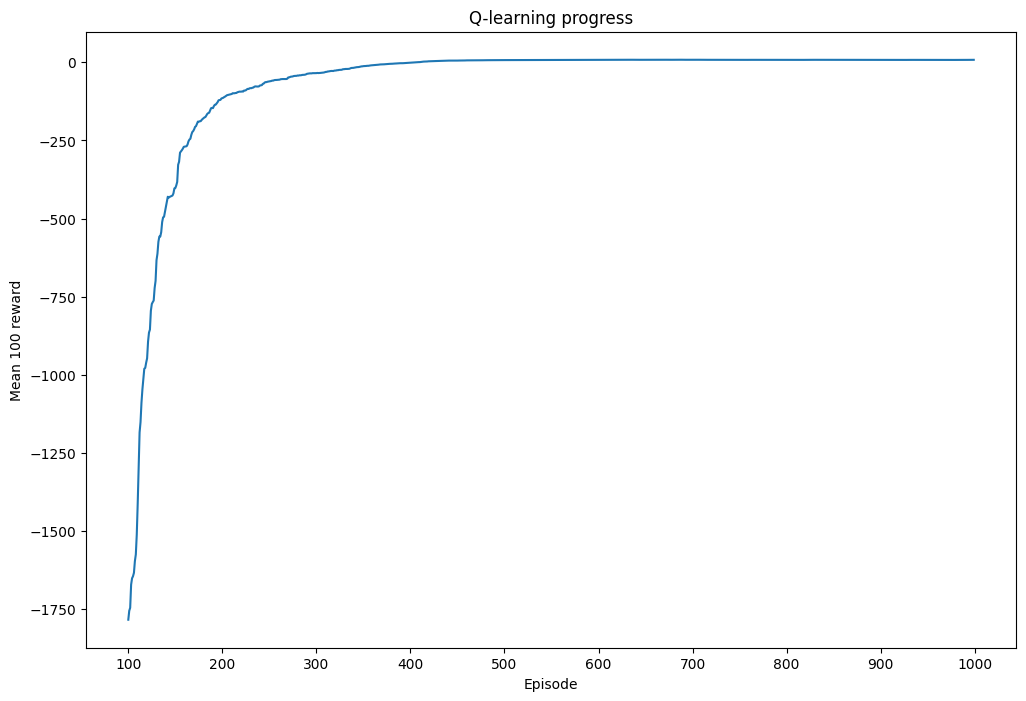

In [6]:
N = 100
mean_rewards = running_mean(scores, N)

fig = plt.figure(figsize=(12, 8))
plt.plot(range(N, len(mean_rewards) + N), mean_rewards)
plt.title('Q-learning progress')
plt.xlabel('Episode')
plt.xticks(np.arange(N, len(mean_rewards) + N + 1, 100))
plt.ylabel(f'Mean {N} reward')
plt.show()
fig.savefig('Qlearning mean rewards', dpi=600)

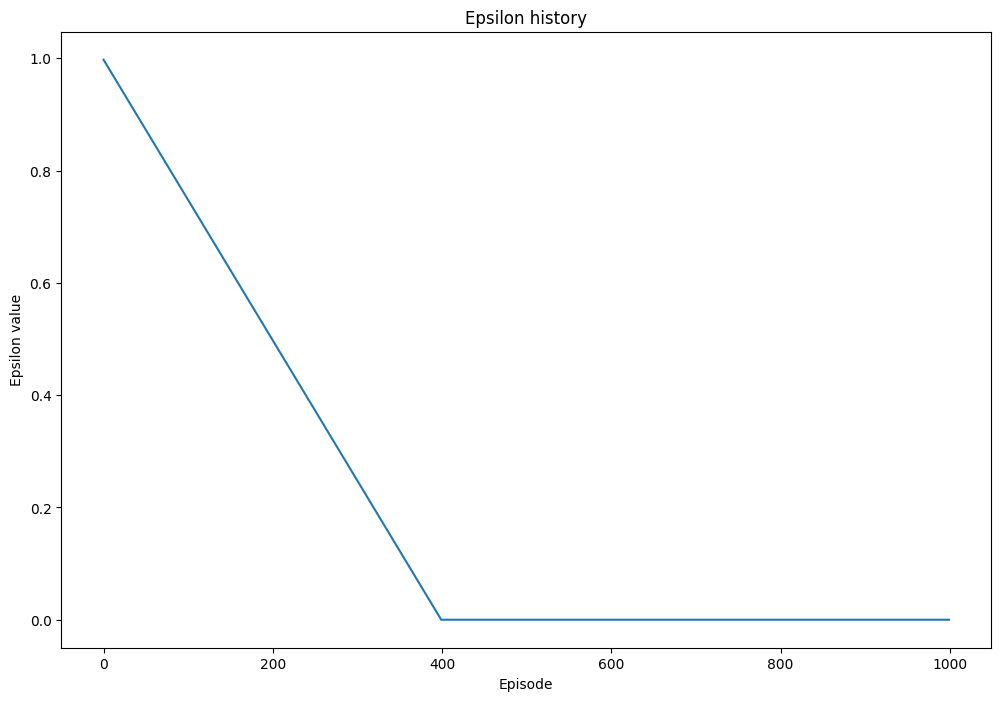

In [7]:
fig = plt.figure(figsize=(12, 8))
plt.plot(eps_history)
plt.title('Epsilon history')
plt.xlabel('Episode')
plt.ylabel('Epsilon value')
plt.show()
fig.savefig('Epsilon history', dpi=600)

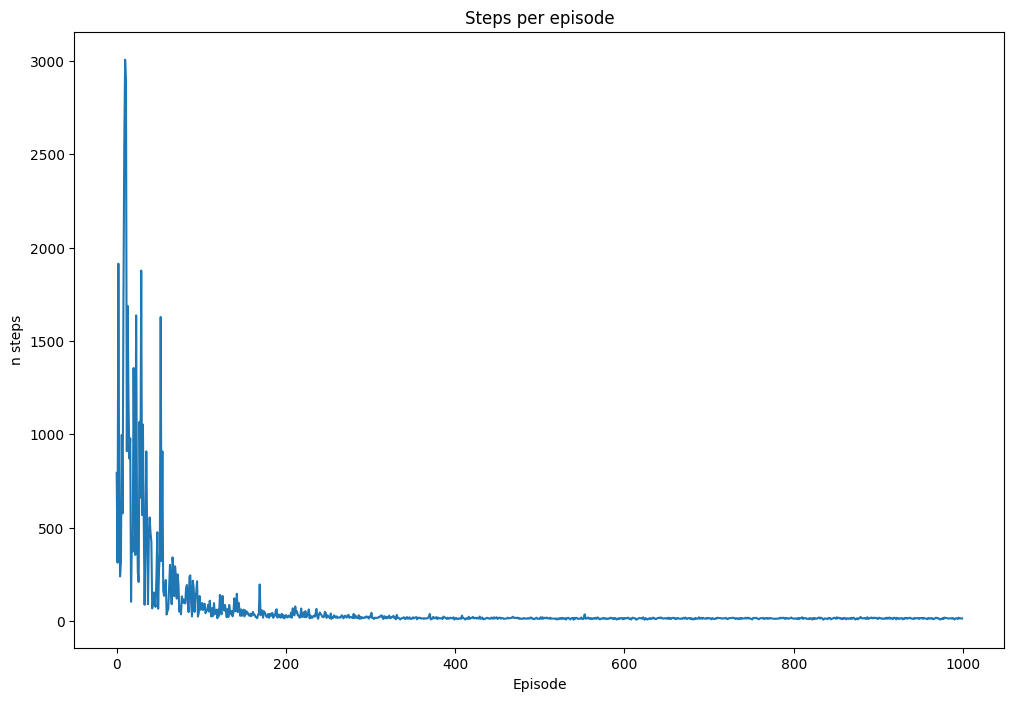

In [8]:
fig = plt.figure(figsize=(12, 8))
plt.plot(steps)
plt.title('Steps per episode')
plt.xlabel('Episode')
plt.ylabel('n steps')
plt.show()
fig.savefig('Steps per episode', dpi=600)

In [9]:
save_agent(agent, 'qlearning_agent.pkl')

Agent saved to qlearning_agent.pkl


In [10]:
loaded_agent = load_agent('qlearning_agent.pkl', env)

Agent loaded from qlearning_agent.pkl


In [21]:
env = gym.make("Taxi-v3", render_mode="rgb_array")
observation = env.reset()[0]

env = RecordVideo(env,
                  video_folder="video",
                  name_prefix="taxi-v3-q-learning")

done = False
total_reward = 0

while not done:
    action = loaded_agent.choose_action(observation)
    observation, reward, done, info = env.step(action)
    total_reward += reward

env.close()
print(f'Total reward for a trained agent: {total_reward}')

Total reward for a trained agent: 9
